## Importing Required Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To give multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Loading Dataset

In [38]:
over_df = pd.read_csv(r"C:\Task\demo_data\6.overlap.csv",header = None)

### Insights of Dataset

In [39]:
over_df.head()
over_df.shape
over_df.info()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


(100, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


### Plotting Scatterplot to visualize the input and output

In [40]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

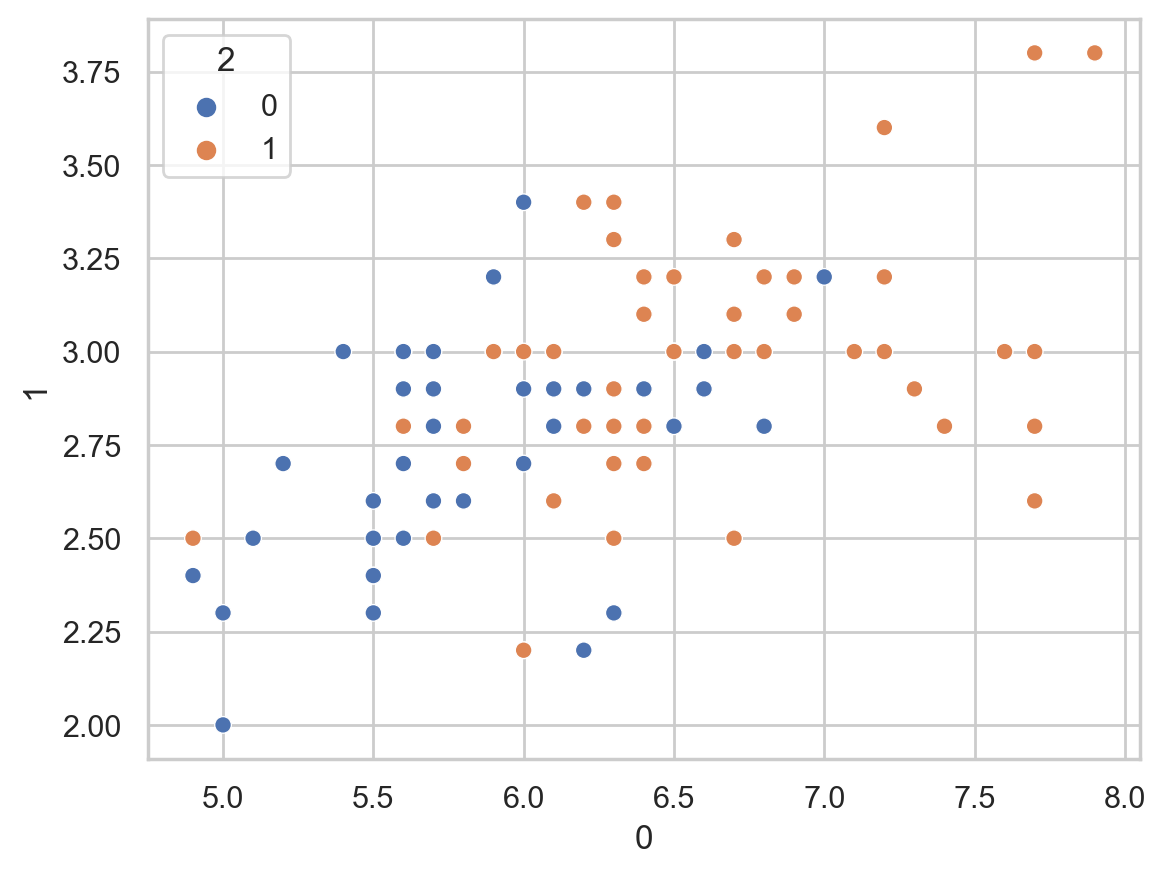

In [41]:
sns.set(style='whitegrid')
sns.scatterplot(x = over_df[0],y = over_df[1] ,hue = over_df[2],data = over_df);

### Train & test Split of the dataset

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(over_df[[0,1]], over_df[2], test_size = 0.2)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Performing standardization 
scaler = StandardScaler()
X_trainf = scaler.fit_transform(X_train)
X_testf = scaler.transform(X_test)

## Building Model 

## 1st Round

In [46]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [47]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'he_uniform',input_dim = 2)) # No.of Neurons
model.add(Dense(5,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dense(3,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dense(2,activation = 'relu',kernel_initializer = 'he_uniform'))

model.add(Dense(1,activation = 'sigmoid'))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 24        
                                                                 
 dense_11 (Dense)            (None, 5)                 45        
                                                                 
 dense_12 (Dense)            (None, 3)                 18        
                                                                 
 dense_13 (Dense)            (None, 2)                 8         
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [49]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=311,validation_split=0.2)

Epoch 1/311


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


7/7 [==============================] - 2s 38ms/step - loss: 0.7058 - accuracy: 0.3750 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/311
7/7 [==============================] - 0s 9ms/step - loss: 0.7035 - accuracy: 0.3750 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 3/311
7/7 [==============================] - 0s 8ms/step - loss: 0.7022 - accuracy: 0.3906 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 4/311
7/7 [==============================] - 0s 8ms/step - loss: 0.7007 - accuracy: 0.3906 - val_loss: 0.6910 - val_accuracy: 0.5625
Epoch 5/311
7/7 [==============================] - 0s 10ms/step - loss: 0.6995 - accuracy: 0.4375 - val_loss: 0.6912 - val_accuracy: 0.6250
Epoch 6/311
7/7 [==============================] - 0s 10ms/step - loss: 0.6984 - accuracy: 0.4375 - val_loss: 0.6914 - val_accuracy: 0.6250
Epoch 7/311
7/7 [==============================] - 0s 8ms/step - loss: 0.6975 - accuracy: 0.4219 - val_loss: 0.6919 - val_accuracy: 0.5625
Epoch 8/311
7/7 [===================

### Evaluation of Model

In [51]:
y_pred = model.predict(X_testf) 

1/1 [==============================] - 0s 92ms/step


In [52]:
y_capf = np.where(y_pred>0.5,1,0)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.4

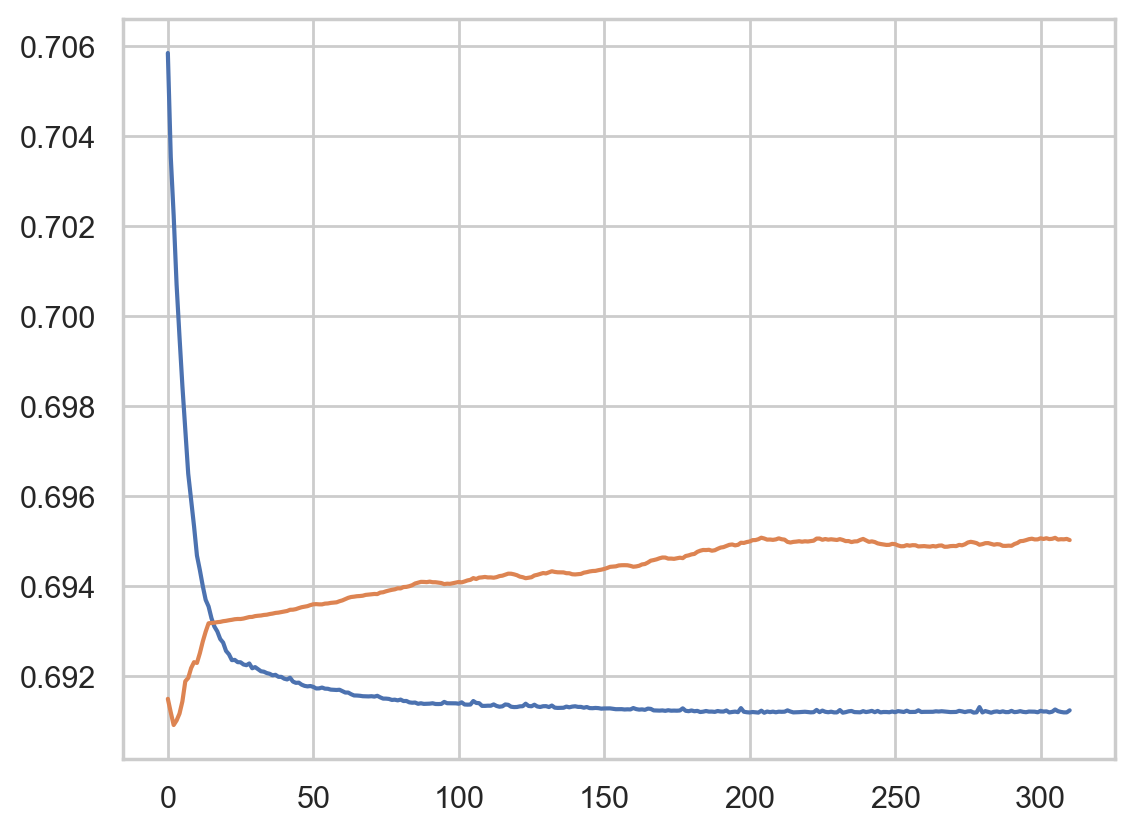

In [54]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### Plotting Decision Regions

In [55]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 14s 1ms/step


C:\Users\prave\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

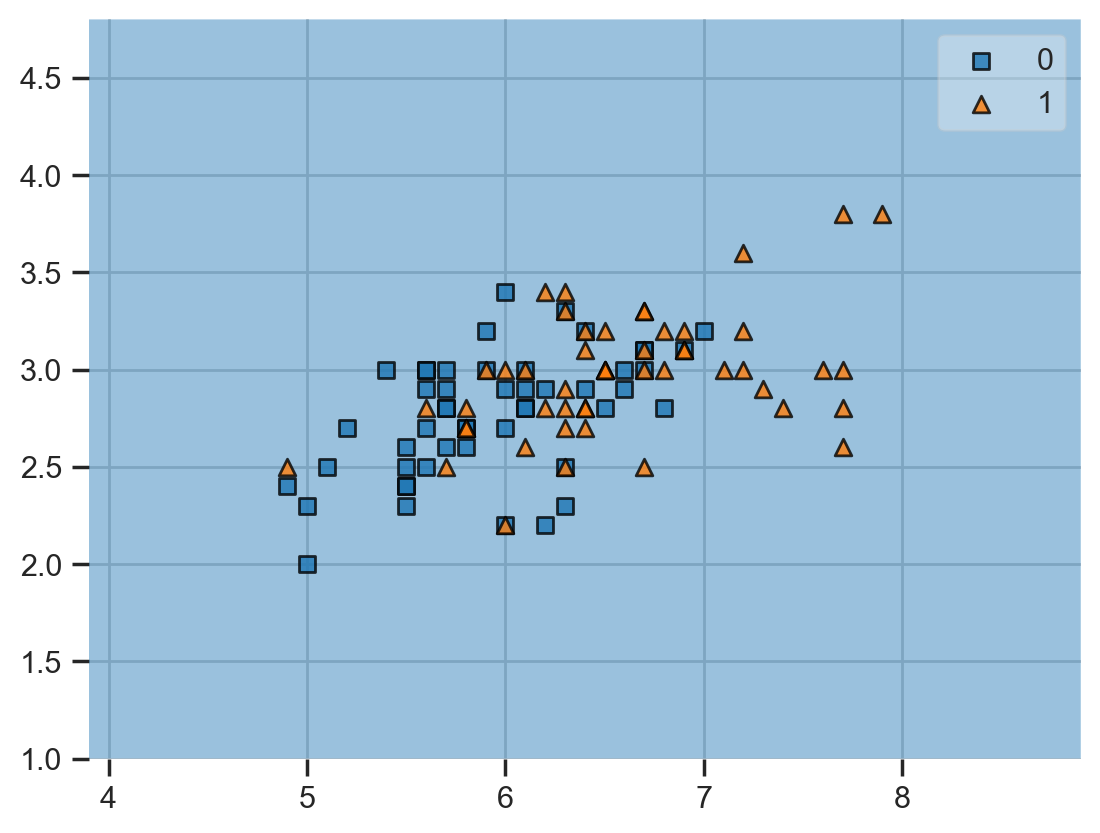

In [56]:
plot_decision_regions(over_df[[0,1]].values, over_df[2].values.astype(int), clf = model)

## 2nd Round

In [66]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'he_uniform',input_dim = 2)) # No.of Neurons
model.add(Dense(6,activation = 'relu',kernel_initializer= 'he_uniform'))

model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 24        
                                                                 
 dense_21 (Dense)            (None, 6)                 54        
                                                                 
 dense_22 (Dense)            (None, 2)                 14        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [68]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(X_trainf,y_train,batch_size=15,epochs=264,validation_split=0.2)

Epoch 1/264


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


5/5 [==============================] - 2s 73ms/step - loss: 0.6887 - accuracy: 0.4688 - val_loss: 0.6553 - val_accuracy: 0.5000
Epoch 2/264
5/5 [==============================] - 0s 15ms/step - loss: 0.6804 - accuracy: 0.5000 - val_loss: 0.6464 - val_accuracy: 0.5000
Epoch 3/264
5/5 [==============================] - 0s 14ms/step - loss: 0.6742 - accuracy: 0.5312 - val_loss: 0.6381 - val_accuracy: 0.5000
Epoch 4/264
5/5 [==============================] - 0s 13ms/step - loss: 0.6679 - accuracy: 0.5156 - val_loss: 0.6301 - val_accuracy: 0.5000
Epoch 5/264
5/5 [==============================] - 0s 16ms/step - loss: 0.6627 - accuracy: 0.5156 - val_loss: 0.6224 - val_accuracy: 0.5000
Epoch 6/264
5/5 [==============================] - 0s 17ms/step - loss: 0.6584 - accuracy: 0.5156 - val_loss: 0.6156 - val_accuracy: 0.5000
Epoch 7/264
5/5 [==============================] - 0s 17ms/step - loss: 0.6539 - accuracy: 0.5156 - val_loss: 0.6105 - val_accuracy: 0.5625
Epoch 8/264
5/5 [===============

### Evaluation of Model

In [70]:
y_pred = model.predict(X_testf) 

1/1 [==============================] - 0s 118ms/step


In [71]:
y_capf = np.where(y_pred>0.5,1,0)

In [72]:
accuracy_score(y_test,y_capf)

0.6

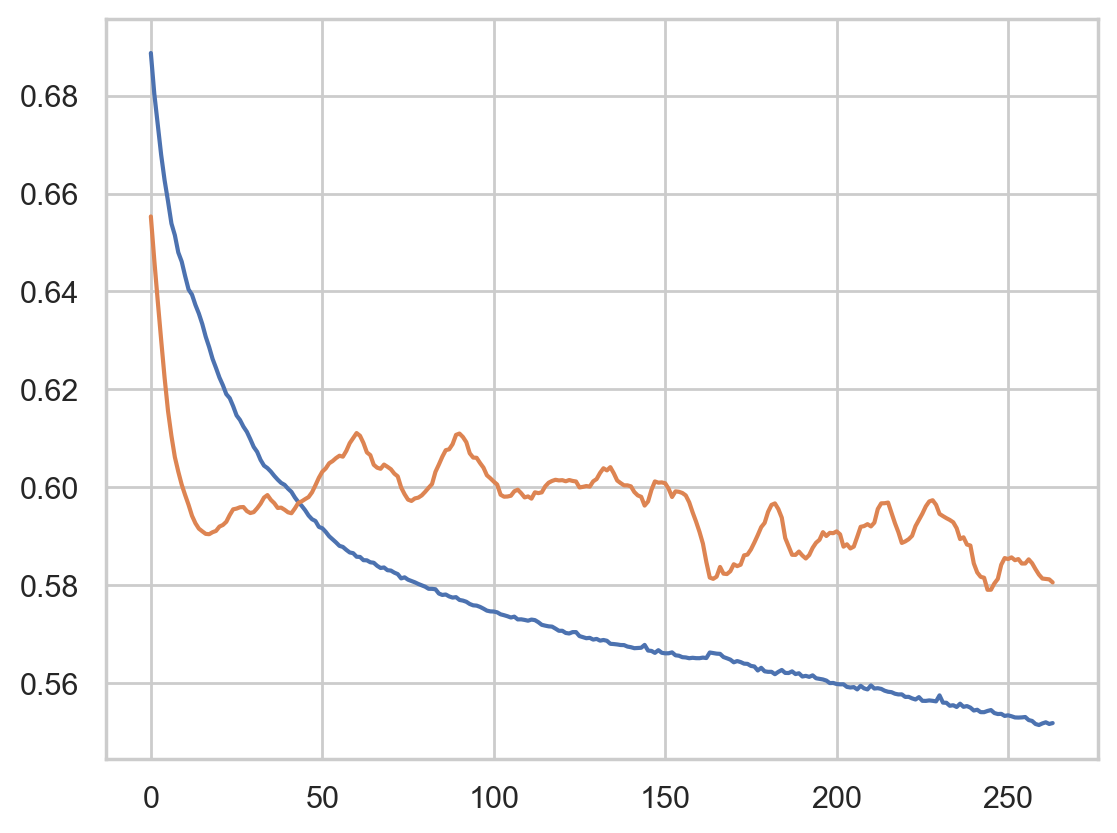

In [73]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 9s 928us/step


C:\Users\prave\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

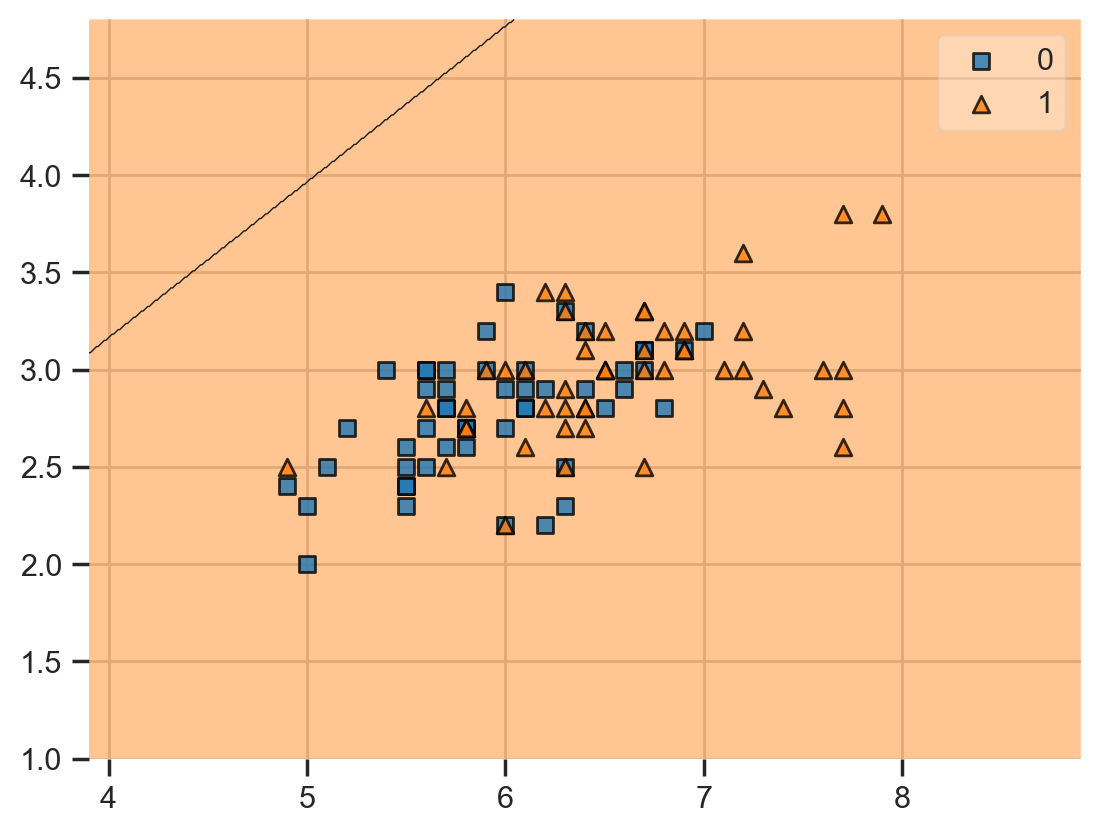

In [74]:
plot_decision_regions(over_df[[0,1]].values, over_df[2].values.astype(int), clf = model)